In [1]:
%pwd

'd:\\RadarLab\\UnderstandingPytorch'

In [2]:
%cd /

d:\


In [3]:
from google.colab import drive
drive.mount("Gdrive")

ModuleNotFoundError: No module named 'google'

In [ ]:
%cd /Gdrive/MyDrive/landmark_images

/Gdrive/MyDrive/landmark_images


In [ ]:
!mkdir Validation_data

In [ ]:
os.chdir("/Gdrive/MyDrive/AnimalDataset")

#Imports

In [ ]:
import os
from torchvision import transforms,datasets
import random

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import glob
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import Dataset, DataLoader
from PIL import Image



In [ ]:
""" As the images were taken from the internet, we make some transformation on them
   like resizing and converting to Tensor """

train_transforms = transforms.Compose ([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    #To normalize
   # transforms.Normalize([0.4916,0.4498,0.4000],[0.2474, 0.2362, 0.2322])


    ])

validation_transforms = transforms.Compose([
     transforms.Resize(size=(224,224)),
     transforms.ToTensor(),
      #To normalize
   # transforms.Normalize([0.4916,0.4498,0.4000],[0.2474, 0.2362, 0.2322])
])

ImageFolder is a generic data loader with a condition that the images must be arranged in a format similar to below


---


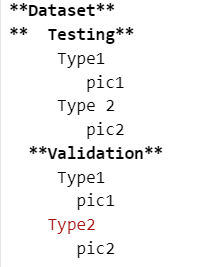


**Parameters for ImageFolder**

root (str or pathlib.Path) – Root directory path.

transform (callable, optional) – A function/transform that takes in a PIL image and returns a transformed version. E.g, transforms.RandomCrop

target_transform (callable, optional) – A function/transform that takes in the target and transforms it.

loader (callable, optional) – A function to load an image given its path.

is_valid_file (callable, optional) – A function that takes path of an Image file and check if the file is a valid file (used to check of corrupt files)

allow_empty – If True, empty folders are considered to be valid classes. An error is raised on empty folders if False (default).

In [ ]:
train_dir= "/Gdrive/MyDrive/AnimalDataset/Training_data"
validation_dir="/Gdrive/MyDrive/AnimalDataset/Validation_data"

In [ ]:
train_data = datasets.ImageFolder(root=train_dir, transform= train_transforms)
validation_data= datasets.ImageFolder(root=validation_dir, transform=validation_transforms)

print(f"Train data:\n{train_data}\n\nValidation data:\n{validation_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 20
    Root location: /Gdrive/MyDrive/AnimalDataset/Training_data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

Validation data:
Dataset ImageFolder
    Number of datapoints: 6
    Root location: /Gdrive/MyDrive/AnimalDataset/Validation_data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:
train_set = DataLoader(dataset=train_data,
                              batch_size=16, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

validation_set = DataLoader(dataset=validation_data,
                             batch_size=16,
                             num_workers=1,
                             shuffle=False) #

{0: 'Cats', 1: 'Dogs'}


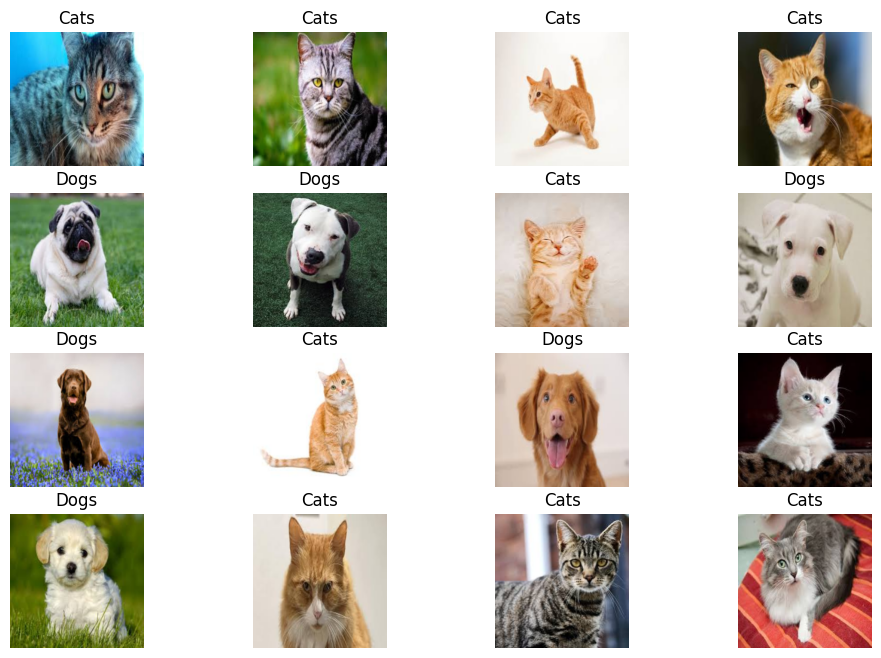

In [ ]:
# I create train_data above , and I will use it here
label_dict = {y: x for x, y in train_data.class_to_idx.items()}
print(label_dict)

# Define a function to display images
def show_images(images, labels):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        image = to_pil_image(images[i])  # Convert tensor to PIL Image
        plt.imshow(image)
        plt.title(label_dict[labels[i].item()])  # Convert numerical label to string label
        plt.axis('off')
    plt.show()

# Get the first batch
for batch_idx, (images, labels) in enumerate(train_set):
    if batch_idx == 0:  # Only process the first batch
        show_images(images, labels)
        break

##Data Loading using Custom Datasets

In [ ]:

class CustomDataset(Dataset):
  """custom dataset loading class for cats and dogs data loading"""
  def __init__(self, dataset_path, dataset_type = "train",  transforms=None):
    super().__init__() # giving access of parents method
    self.dataset = dataset_path
    self.transforms = transforms

    # sub folders
    if dataset_type == "train":
      self.dataset = os.path.join(self.dataset, "Training_data")
    else:
      self.dataset = os.path.join(self.dataset, "Validation_data")

    self.cats = os.path.join(self.dataset, "Cats")
    self.dogs = os.path.join(self.dataset, "Dogs")
    self.data = [self.cats, self.dogs]

  def __len__(self):
    return len(os.listdir(self.cats)) + len(os.listdir(self.dogs))

  def __getitem__(self, ind):
    cat_images = os.listdir(self.cats)
    dog_images = os.listdir(self.dogs)
    # cat : 0
    # dog : 1

    cat_images_path = []
    for img in cat_images:
      full_path = os.path.join(self.cats, img)
      cat_images_path.append((full_path, 0))

    dog_images_path = []
    for img in dog_images:
      full_path = os.path.join(self.dogs, img)
      dog_images_path.append((full_path, 1))

    total_images = dog_images_path + cat_images_path
    import random
    random.shuffle(total_images)
    data = total_images[ind]
    img, label = data
    image = Image.open(img)
    image.show()
   # if self.transforms:
    #        image = self.transforms(image)
    return (image, label)

    # opencv #pillow
#tf = transforms.ToTensor()
train_dataset = CustomDataset("/Gdrive/MyDrive/AnimalDataset","train",None)
print(train_dataset.__getitem__(2))







(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x7B2198092EF0>, 0)


In [ ]:

dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)


## For Landmarks

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/Gdrive/MyDrive/landmark_images/landmark_images/train.zip", 'r')
zip_ref.extractall("/Gdrive/MyDrive/landmark_images/landmark_images")
zip_ref.close()

In [ ]:
train_transforms2 = transforms.Compose(
    [    transforms.ToPILImage(),
         transforms.Resize(size=(224, 224)),
         transforms.ToTensor(),
         transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ]
)

test_transform2 = transforms.Compose(
    [    transforms.ToPILImage(),
         transforms.Resize(size=(224,224)),
         transforms.ToTensor(),
         transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

    ]
)

In [ ]:
from pandas.core.common import flatten
train_data_path = '/Gdrive/MyDrive/landmark_images/landmark_images/train'
test_data_path = '/Gdrive/MyDrive/landmark_images/landmark_images/test'
train_image_paths = [] #to store image paths in list
classes = [] #to store class values
test_image_paths = []
for data_path in glob.glob(train_data_path + '/*'): #takes path of every image in the train folder
    classes.append(data_path.split('/')[-1]) # splits the path and extracts the last name
    train_image_paths.append(glob.glob(data_path + '/*'))
for data_path in glob.glob(test_data_path + '/*'): #takes path of every image in the train folder
    test_image_paths.append(glob.glob(data_path + '/*'))
"""
 for datapath in os.dirlist(train_data_path):
       classes.append(datapath.split('/')[-1])
       train_image_paths.append(os.dirlist(datapath))

"""

train_image_paths = list(flatten(train_image_paths))
random.shuffle(train_image_paths)


print('train_image_path example: ', train_image_paths[1])
print('class example: ', classes[1])
#2.
# split train valid from train paths (80,20)
train_image_paths, valid_image_paths = train_image_paths[:int(0.8*len(train_image_paths))], train_image_paths[int(0.8*len(train_image_paths)):]

#3.
# create the test_image_paths

print(f'test iamges: {type(train_image_paths)}')
test_image_paths =(test_image_paths)

print("\nTrain size: {}\nValid size: {}\nTest size: {}".format(len(train_image_paths), len(valid_image_paths), len(test_image_paths)))

train_image_path example:  /Gdrive/MyDrive/landmark_images/landmark_images/train/19.Vienna_City_Hall/7f2e07915dc995d1.jpg
class example:  01.Mount_Rainier_National_Park
test iamges: <class 'list'>

Train size: 3996
Valid size: 1000
Test size: 50


In [ ]:
#creating index to class and class to index dictionaries
idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}
class_to_idx = {}
print(idx_to_class)
print(class_to_idx)

{0: '00.Haleakala_National_Park', 1: '01.Mount_Rainier_National_Park', 2: '02.Ljubljana_Castle', 3: '03.Dead_Sea', 4: '04.Wroclaws_Dwarves', 5: '05.London_Olympic_Stadium', 6: '06.Niagara_Falls', 7: '07.Stonehenge', 8: '08.Grand_Canyon', 9: '09.Golden_Gate_Bridge', 10: '10.Edinburgh_Castle', 11: '11.Mount_Rushmore_National_Memorial', 12: '12.Kantanagar_Temple', 13: '13.Yellowstone_National_Park', 14: '14.Terminal_Tower', 15: '15.Central_Park', 16: '16.Eiffel_Tower', 17: '17.Changdeokgung', 18: '18.Delicate_Arch', 19: '19.Vienna_City_Hall', 20: '20.Matterhorn', 21: '21.Taj_Mahal', 22: '22.Moscow_Raceway', 23: '23.Externsteine', 24: '24.Soreq_Cave', 25: '25.Banff_National_Park', 26: '26.Pont_du_Gard', 27: '27.Seattle_Japanese_Garden', 28: '28.Sydney_Harbour_Bridge', 29: '29.Petronas_Towers', 30: '30.Brooklyn_Bridge', 31: '31.Washington_Monument', 32: '32.Hanging_Temple', 33: '33.Sydney_Opera_House', 34: '34.Great_Barrier_Reef', 35: '35.Monumento_a_la_Revolucion', 36: '36.Badlands_Nationa

In [ ]:
#printing the length of the train and test data
print('Length of train: ', len(train_image_paths))
print('Length of test: ', len(test_image_paths))

Length of train:  3996
Length of test:  50


In [ ]:
import cv2

#Defining Dataset Class
class LandmarkDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        #image = Image.open(image_filepath)
        #image.show()
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        label = image_filepath.split('/')[-2]
        label = class_to_idx[label]

        # print(image.shape, label)
        if self.transform is not None:
            image = self.transform(image)

        return image, label

train_dataset = LandmarkDataset(train_image_paths, train_transforms2)
valid_dataset = LandmarkDataset(valid_image_paths, test_transform2) #test transforms are applied
test_dataset = LandmarkDataset(test_image_paths,test_transform2)

print(train_dataset)


In [ ]:
print(len(train_dataset))

3996


In [ ]:
train_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True
)

valid_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True
)


test_loader = DataLoader(
   train_dataset, batch_size=64, shuffle=True)


loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

In [ ]:
batch = next(iter(train_loader))


In [ ]:
images, labels = batch

In [ ]:
type(images), type(labels)

(torch.Tensor, torch.Tensor)

In [ ]:
# shape
images.shape, labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [ ]:
ind = 63
image = images[ind, :, :, :]
label = labels[ind]
print(image.shape, label)

torch.Size([3, 224, 224]) tensor(33)


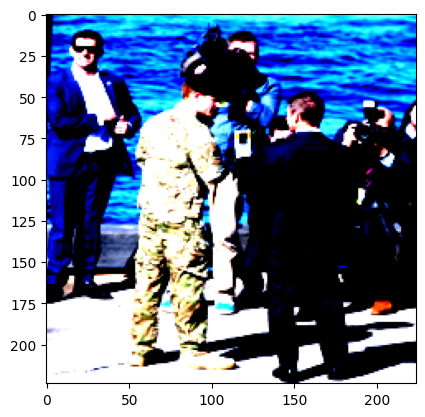

In [ ]:
plt.imshow(image.permute(1, 2, 0) )